This notebook contains analysis on average rent values for years 2009 to 2019.

In [1]:
#Importing packages
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

import seaborn as sns

In [2]:
#Importing the data as panda dataframe
df_allrent = pd.read_csv('dbAvgRent2009-2019.csv')

df_allrent.head()

,REF_DATE,GEO,DGUID,Type of structure,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2009,"Montréal, Quebec",2011S0503462,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v3822821,46.3.1,514.0,NaN,NaN,NaN,0
1,2010,"Montréal, Quebec",2011S0503462,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v3822821,46.3.1,526.0,NaN,NaN,NaN,0
2,2011,"Montréal, Quebec",2011S0503462,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v3822821,46.3.1,549.0,NaN,NaN,NaN,0
3,2012,"Montréal, Quebec",2011S0503462,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v3822821,46.3.1,539.0,NaN,NaN,NaN,0
4,2013,"Montréal, Quebec",2011S0503462,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v3822821,46.3.1,555.0,NaN,NaN,NaN,0


In [3]:
#Quick look at the data:
df_allrent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REF_DATE           1056 non-null   int64  
 1   GEO                1056 non-null   object 
 2   DGUID              1056 non-null   object 
 3   Type of structure  1056 non-null   object 
 4   Type of unit       1056 non-null   object 
 5   UOM                1056 non-null   object 
 6   UOM_ID             1056 non-null   int64  
 7   SCALAR_FACTOR      1056 non-null   object 
 8   SCALAR_ID          1056 non-null   int64  
 9   VECTOR             1056 non-null   object 
 10  COORDINATE         1056 non-null   object 
 11  VALUE              1005 non-null   float64
 12  STATUS             51 non-null     object 
 13  SYMBOL             0 non-null      float64
 14  TERMINATED         0 non-null      float64
 15  DECIMALS           1056 non-null   int64  
dtypes: float64(3), int64(4),

In [4]:
#Dropping the empty columns (columns with 0 non-null count):
df_allrent = df_allrent.drop(['SYMBOL', 'TERMINATED'], axis=1)

#Dropping columns that do not contribute information for the analysis:
df_allrent = df_allrent.drop(['DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 
                              'COORDINATE', 'STATUS', 'DECIMALS'], axis=1)

df_allrent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REF_DATE           1056 non-null   int64  
 1   GEO                1056 non-null   object 
 2   Type of structure  1056 non-null   object 
 3   Type of unit       1056 non-null   object 
 4   VALUE              1005 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.4+ KB


In [5]:
df_allrent

,REF_DATE,GEO,Type of structure,Type of unit,VALUE
0,2009,"Montréal, Quebec",Row and apartment structures of three units an...,Bachelor units,514.0
1,2010,"Montréal, Quebec",Row and apartment structures of three units an...,Bachelor units,526.0
2,2011,"Montréal, Quebec",Row and apartment structures of three units an...,Bachelor units,549.0
3,2012,"Montréal, Quebec",Row and apartment structures of three units an...,Bachelor units,539.0
4,2013,"Montréal, Quebec",Row and apartment structures of three units an...,Bachelor units,555.0
...,...,...,...,...,...
1051,2015,"Vancouver, British Columbia",Apartment structures of six units and over,Three bedroom units,1616.0
1052,2016,"Vancouver, British Columbia",Apartment structures of six units and over,Three bedroom units,1641.0
1053,2017,"Vancouver, British Columbia",Apartment structures of six units and over,Three bedroom units,1812.0
1054,2018,"Vancouver, British Columbia",Apartment structures of six units and over,Three bedroom units,1934.0


In [6]:
#Selecting rows of data which contain information on Toronto, Vancouver, and Calgary markets:

df_toronto = df_allrent.loc[df_allrent['GEO'] == 'Toronto, Ontario']
df_vancouver = df_allrent.loc[df_allrent['GEO'] == 'Vancouver, British Columbia']
df_calgary = df_allrent.loc[df_allrent['GEO'] == 'Calgary, Alberta']

df_rents = pd.concat([df_toronto, df_vancouver, df_calgary], axis=0)
df_rents

,REF_DATE,GEO,Type of structure,Type of unit,VALUE
352,2009,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,758.0
353,2010,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,777.0
354,2011,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,819.0
355,2012,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,837.0
356,2013,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,873.0
...,...,...,...,...,...
699,2015,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1441.0
700,2016,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1468.0
701,2017,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1453.0
702,2018,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1433.0


In [7]:
df_rents['Type of structure'].unique()

array(['Row and apartment structures of three units and over',
       'Row structures of three units and over',
       'Apartment structures of three units and over',
       'Apartment structures of six units and over'], dtype=object)

A look at the "Type of structure" column shows that the structures have been classified into the four following categories: "row and apartment stuctures of 3+ units", "row structures of 3+ units", "apartment structures of 3+ units", and "apartment structures of 6+ units".

Since the combined category of "row and apartment stuctures of 3+ units" covers information on both "row structures of 3+ units" and "apartment structures of 3+ units", these two individual categories can be dropped.

A dataframe is created from only structure types of "Row and apartment structures of three units and over" and "Apartment structures of six units and over":

In [8]:
df_rent1 = df_rents.loc[df_rents['Type of structure'] == 'Row and apartment structures of three units and over']
df_rent2 = df_rents.loc[df_rents['Type of structure'] == 'Apartment structures of six units and over']

df_rent = pd.concat([df_rent1, df_rent2], axis=0, ignore_index=True)
df_rent

,REF_DATE,GEO,Type of structure,Type of unit,VALUE
0,2009,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,758.0
1,2010,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,777.0
2,2011,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,819.0
3,2012,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,837.0
4,2013,"Toronto, Ontario",Row and apartment structures of three units an...,Bachelor units,873.0
...,...,...,...,...,...
259,2015,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1441.0
260,2016,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1468.0
261,2017,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1453.0
262,2018,"Calgary, Alberta",Apartment structures of six units and over,Three bedroom units,1433.0


In [9]:
#Checking for the number of missing values:
df_rent['VALUE'].isnull().sum()

0

With no missing values in the dataframe, we can continue with the analysis.

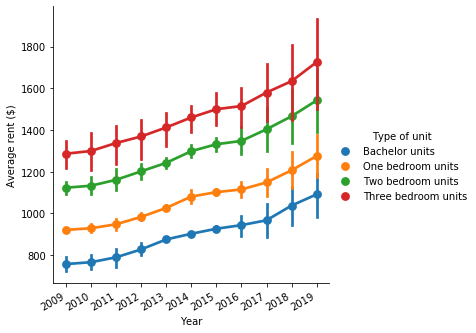

In [10]:
fig1 = sns.catplot(x='REF_DATE', y='VALUE', hue='Type of unit', kind='point', data=df_rent)
fig1.set(xlabel='Year', ylabel='Average rent ($)')
fig1._legend.set_title("Type of unit")
fig1.fig.autofmt_xdate();

The rate of rent increase throughout the years seems to be similar among all unit types as seen by the similar slopes of the lines.
Across the three cities and for all years, the average rent shows an increase as the bedroom numbers are increased. As the number of bedrooms are increased, the highest rent jump is observed between rents of one bedroom and two bedroom units. The average percent change for rent between one bedroom and two bedroom units is 21% as calculated below.

In [11]:
#Grouping by year and type of unit:
df_group1 = df_rent.groupby(['REF_DATE', 'Type of unit']).VALUE.mean().reset_index()

#Sorting to get the following order in "Type of unit": Bachelor, one bedroom, two bedroom, three bedroom
#The order above also corresponds to ascending order for 'VALUE', therefore we can sort for 'VALUE':
df_group1 = df_group1.sort_values(['REF_DATE', 'VALUE'], ascending=[True, True])

#Calculating percent change between types of unit in each year:
df_group1['Percent_Change'] = df_group1['VALUE'].pct_change()

#The pct_change() function calculates changes in values compared to their previous row. The "bachelor units" rows can be 
#dropped since their preceding rows are rows of "three bedroom units", and the percent changes data of our interest are 
#changes as the number of bedrooms are increased (there is no bedroom increase from three bedroom to bachelor, therefore the
#calculated pct_change() for bachelor units is meaningless in the context of our analysis). 
df_group2 = df_group1.loc[df_group1['Type of unit'] != 'Bachelor units']
df_group2 = df_group2.groupby(['Type of unit']).Percent_Change.mean().reset_index()
df_group2 = df_group2.sort_values(['Percent_Change'])
df_group2

,Type of unit,Percent_Change
1,Three bedroom units,0.132226
0,One bedroom units,0.188914
2,Two bedroom units,0.214601


As mentioned above, while the average percent change for rent between one bedroom and two bedroom units is 21%, the average percent change for rent between two bedroom and three bedroom units is only 13%.

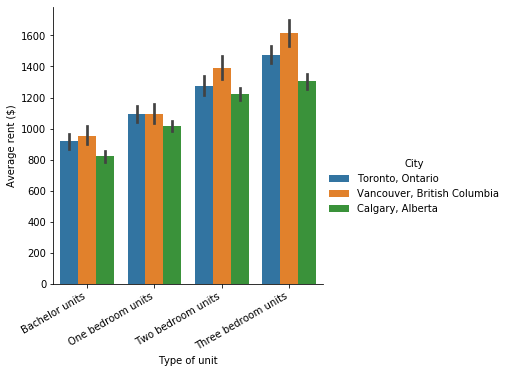

In [12]:
fig2 = sns.catplot(x='Type of unit', y='VALUE', hue='GEO', kind='bar', data=df_rent)
fig2.set(xlabel='Type of unit', ylabel='Average rent ($)')
fig2._legend.set_title("City")
fig2.fig.autofmt_xdate();

As seen, apart from the exception of rent values for one bedroom units, Vancouver has the highest rent for all unit types. Calgary has the lowest average rent values among the three cities for all unit types.
The average percentages of rent increase in each city as the number of bedrooms are increased is calculated below:

In [13]:
#Grouping by type of unit and city:
df_group3 = df_rent.groupby(['GEO', 'Type of unit']).VALUE.mean().reset_index()

#Sorting to get the following order in "Type of unit": Bachelor, one bedroom, two bedroom, three bedroom
#The order above also corresponds to ascending order for 'VALUE', therefore we can sort for 'VALUE':
df_group3 = df_group3.sort_values(['GEO', 'VALUE'], ascending=[True, True])

#Calculating percent change between types of unit in each year:
df_group3['Percent_Change'] = df_group3['VALUE'].pct_change()

#The pct_change() function calculates changes in values compared to their previous row. The "bachelor units" rows can be 
#dropped since their preceding rows are rows of "three bedroom units", and the percent changes data of our interest are 
#changes as the number of bedrooms are increased (there is no bedroom increase from three bedroom to bachelor, therefore the
#calculated pct_change() for bachelor units is meaningless in the context of our analysis). 
df_group4 = df_group3.loc[df_group3['Type of unit'] != 'Bachelor units'].reset_index(drop=True)
df_group4

,GEO,Type of unit,VALUE,Percent_Change
0,"Calgary, Alberta",One bedroom units,1016.136364,0.235971
1,"Calgary, Alberta",Two bedroom units,1221.181818,0.201789
2,"Calgary, Alberta",Three bedroom units,1306.545455,0.069902
3,"Toronto, Ontario",One bedroom units,1092.681818,0.188931
4,"Toronto, Ontario",Two bedroom units,1276.863636,0.168559
5,"Toronto, Ontario",Three bedroom units,1475.636364,0.155673
6,"Vancouver, British Columbia",One bedroom units,1091.545455,0.143851
7,"Vancouver, British Columbia",Two bedroom units,1387.909091,0.271508
8,"Vancouver, British Columbia",Three bedroom units,1613.318182,0.162409


As calculated above, Toronto shows consistent and steady rent increase as the number of bedrooms are increased (between 16-19%). For Vancouver, while the percentage rent difference between bachelor and one bedroom units is 14%, a sudden significant rent jump of 27% is observed between one bedroom and two bedroom units. This percent change drops back down to 16% between two bedroom and three bedroom units in Vancouver. 
Calgary shows only a 7% percent rent difference between two bedroom and three bedroom units; however, the percentage increase from bachelor to one bedroom units and also from one bedroom to two bedroom units is significantly increased to 24% and 20%, respectively.

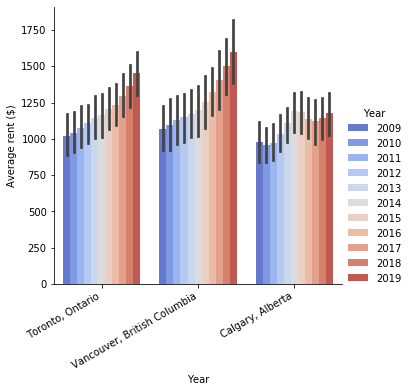

In [14]:
fig3 = sns.catplot(x='GEO', y='VALUE', hue='REF_DATE', kind='bar', palette='coolwarm', data=df_rent)
fig3.set(xlabel='Year', ylabel='Average rent ($)')
fig3._legend.set_title("Year")
fig3.fig.autofmt_xdate();

While Toronto and Vancouver show consistent increase in the average amounts of rents from 2009 to 2019, the average rent values in Calgary follow a rather different trend than the other two cities. For Calgary, although a slight decrease is observed from 2009 to 2010, the general trend for average rent is upwards until 2014 and 2015. After 2015, average rent amounts show a slight decreasing trend until 2017, which then again is switched into a slight increasing trend.

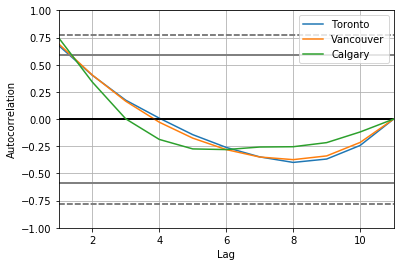

In [15]:
#Autocorrelation plots for rent price of all unit types in Toronto, Vancouver, and Calgary

df_toronto_corr = df_rent.loc[df_rent['GEO'] == 'Toronto, Ontario']
toronto_corr = df_toronto_corr.groupby(['REF_DATE']).VALUE.mean()
toronto_corr_plot = pd.plotting.autocorrelation_plot(toronto_corr, label='Toronto')

df_vancouver_corr = df_rent.loc[df_rent['GEO'] == 'Vancouver, British Columbia']
vancouver_corr = df_vancouver_corr.groupby(['REF_DATE']).VALUE.mean()
vancouver_corr_plot = pd.plotting.autocorrelation_plot(vancouver_corr, label='Vancouver')

df_calgary_corr = df_rent.loc[df_rent['GEO'] == 'Calgary, Alberta']
calgary_corr = df_calgary_corr.groupby(['REF_DATE']).VALUE.mean()
calgary_corr_plot = pd.plotting.autocorrelation_plot(calgary_corr, label='Calgary')

The autocorrelation plots for all three cities fall within the confidence bands and the rent prices show no significant autocorrelation. In other words, past rent prices do not seem to influence future rent prices.

The main reason is rent is controlled in certain markets and it can only be increased to a maximum of inflation. Also, it is unlikely that rent will ever go down.